## Visualize the selected study area and rgi60 glacier area
#### Region (with buffer): [71, 33, 85, 39]

In [57]:
import os
import warnings
warnings.filterwarnings('ignore')
root_proj = '/Users/luo/Library/CloudStorage/OneDrive-Personal/GitHub/Glacier-in-RGI1305'
os.chdir(root_proj)


In [58]:
import matplotlib.pyplot as plt
from utils.geotif_io import readTiff
from utils.imgShow import imgShow
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from matplotlib.colors import LinearSegmentedColormap


In [61]:
path_hma_vec = 'data/boundary/hma_bolch2019.gpkg'
path_wkunlun_vec = 'data/boundary/wkunlun.gpkg'
path_karakoram_vec = 'data/boundary/karakoram.gpkg'
path_wkunlun_rgi60 = 'data/rgi60/rgi60_13_wkunlun.gpkg'
path_karakoram_rgi60 = 'data/rgi60/rgi60_14_karakoram.gpkg'
path_dem = 'data/dem-data/srtm-c/SRTMGL3_wgs84_900m.tif'


In [63]:
dem, dem_info = readTiff(path_dem)


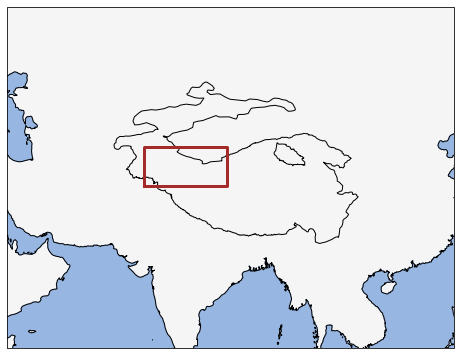

In [65]:
region_x = [71.5, 84.5, 84.5, 71.5, 71.5]
region_y = [33.5, 33.5, 38.5, 38.5, 33.5]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=88.5))
# ax.stock_img()
ax.add_feature(cfeature.LAND, facecolor='WhiteSmoke')
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE, edgecolor='Black')
ax.set_extent([50, 120, 10, 48.0])
# 1. hma region
shp_fea = cfeature.ShapelyFeature(Reader(path_hma_vec).geometries(), \
                                crs=ccrs.PlateCarree(), linewidth=1, edgecolor='black', facecolor='none')
ax.add_feature(shp_fea, zorder=1)
# 2. rectangle region of the study area.
plt.plot(region_x, region_y, transform=ccrs.PlateCarree(), linewidth=3, color='brown')


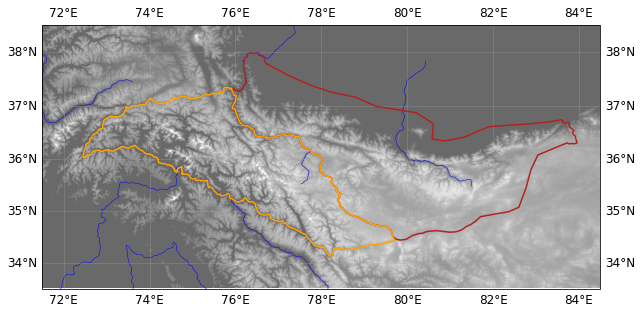

In [89]:
cmap_dem = LinearSegmentedColormap.from_list('linear color', ["DimGray", "white"])
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([71.5, 84.5, 33.5, 38.5])
ax.add_feature(cfeature.RIVERS, color='b', linewidth=0.5, zorder=1)

## 1. dem image
ax_dem = ax.imshow(dem, extent=dem_info['geoextent'], 
                                vmin=3500, vmax=7000, cmap=cmap_dem, \
                                transform=ccrs.PlateCarree(), zorder=0)  # cmap:PRGn
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)

## 2. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='Firebrick', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=2)

## 3. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='Orange', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=2)



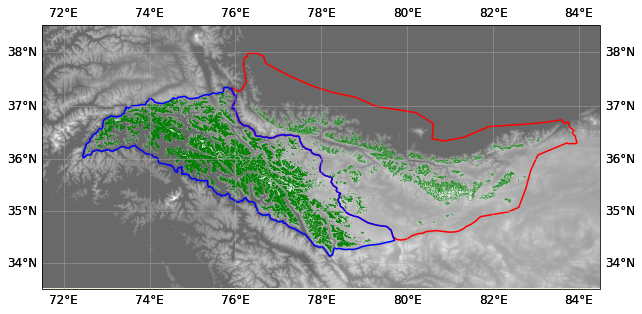

In [76]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())
ax.set_extent([71.5, 84.5, 33.5, 38.5])
ax.add_feature(cfeature.LAND); 
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.4, zorder=1)

## 0. dem image
ax_dem = ax.imshow(dem, extent=dem_info['geoextent'], 
                                vmin=3500, vmax=7000, cmap=cmap_dem, \
                                transform=ccrs.PlateCarree(), zorder=0)  # cmap:PRGn
ax.gridlines(draw_labels=True, linewidth=0.5, alpha=0.5, zorder=1)

## 1. wkunlun boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='red', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 2. karakoram boundary
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_vec).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='blue', linewidth=1.5, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 3. wkunlun glaciers (rgi60); note: very slow
shp_fea = cfeature.ShapelyFeature(Reader(path_wkunlun_rgi60).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='green', linewidth=0.2, facecolor='none')
ax.add_feature(shp_fea, zorder=0)

## 4. karakoram glaciers (rgi60)
shp_fea = cfeature.ShapelyFeature(Reader(path_karakoram_rgi60).geometries(), \
                      crs=ccrs.PlateCarree(), edgecolor='green', linewidth=0.2, facecolor='none')
ax.add_feature(shp_fea, zorder=0)
